Sania Gonsalves

DM Assignment 2

To demonstrate various dimensionality reduction techniques discussed in the class using 

*   a)any tabular data set(Iris dataset)
*   b)any image data set

To showcase 

i) PCA

ii) SVD

iii) LLE

iv) t-SNE

v) ISOMAP

vi) UMAP
 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler

Load Iris dataset

In [ ]:
data_iris = pd.read_csv('/content/Iris.csv')

In [ ]:
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data_iris.shape

(150, 6)

Display number of rows and columns

In [ ]:
X_variables = data_iris.iloc[:,1:5]
X_variables

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y_variable = data_iris.iloc[:,5]

**PCA**

In [ ]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)

In [ ]:
covariance_matrix = np.cov(transformed_df.T)

In [ ]:
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [ ]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


In [ ]:
pca = PCA()

In [ ]:
pca = pca.fit(transformed_df)

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

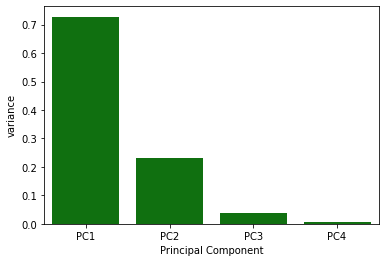

In [ ]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4']})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="g");

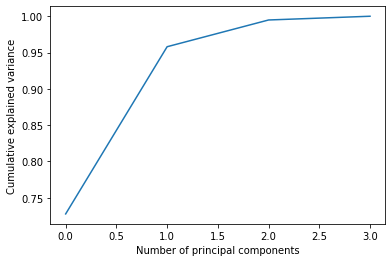

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X_variables)

In [ ]:
data_iris['Species'] = data_iris['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

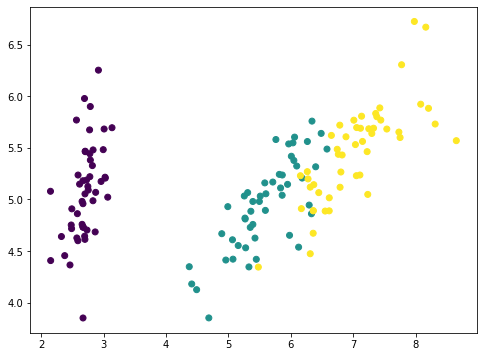

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=data_iris['Species'])
plt.show()

In [ ]:
pca_4 = PCA(n_components =4 )
pca_4 = pca_4.fit(transformed_df)
pca_4d = pca_4.transform(X_variables)

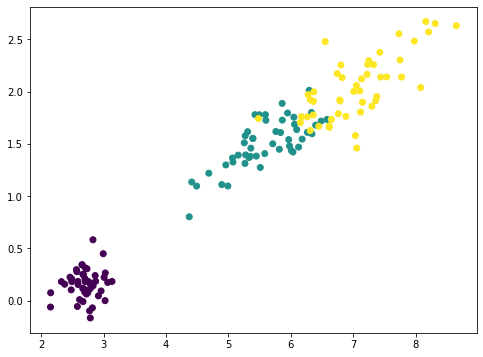

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(pca_4d[:,0], pca_4d[:,3],c=data_iris['Species'])
plt.show()

**Implementation of SVD**

In [ ]:
from numpy import linalg
import sys
import cv2

SVD is a factorization used for solving linear equations, dimensionality reduction, data compression

It's based on the following decomposition:
𝐴=𝑈Σ𝑉∗
 

In which the matrix A (m x n) can be factorized into three matrices:
U (m x m) unitary matrix
Σ (m x n) rectangular diagonal matrix
V (n x n) unitary matrix

Columns of V are the eigenvectors of A*A called singular vectors
Columns of U are the eigenvectors of AA* called singular vectors
The elements on the diagonal of Σ are the ordered non-zero eigenvalues of both A*A and AA* called singular values

In [ ]:
def svd(A, tol=1e-5):
    #singular values and right singular vectors coming from eigenvalues and eigenvectors of A' x A
    eigs, V = linalg.eig(A.T.dot(A))

    #singular values are the square root of the eigenvalues
    sing_vals = np.sqrt(eigs)

    #sort both sigular values and right singular vector
    idx = np.argsort(sing_vals)

    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]

    #remove zero singular values 
    sing_vals_trunc = sing_vals[sing_vals>tol]
    V = V[:, sing_vals>tol]
    sigma = sing_vals_trunc

    #evaluate U matrix
    U = A @ V /sing_vals_trunc
    
    return U.real, sigma.real, V.T.real

In [ ]:
def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

SVD for dimensionality reduction
We can see how svd decomposition applies to dimensionality reduction, in this example, using the Iris dataset

In [ ]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data = pd.DataFrame(iris.data)
feature_names = iris["feature_names"]
data.columns = feature_names
data["labels"] = iris.target

In [ ]:
def custom_pairplot(data, feature_names, labels):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(left = 0, right=1.5, bottom=0, top=1.5)
    n_features = len(feature_names)
    
    for i in range(len(feature_names)):
        for j in range(len(feature_names)):
            plt.subplot(n_features, n_features, i*n_features+j+1)
            if i==j:
                sns.violinplot(data=data, x=labels, y=feature_names[i])
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], c=data[labels])
                plt.xlabel(feature_names[i])
                plt.ylabel(feature_names[j])

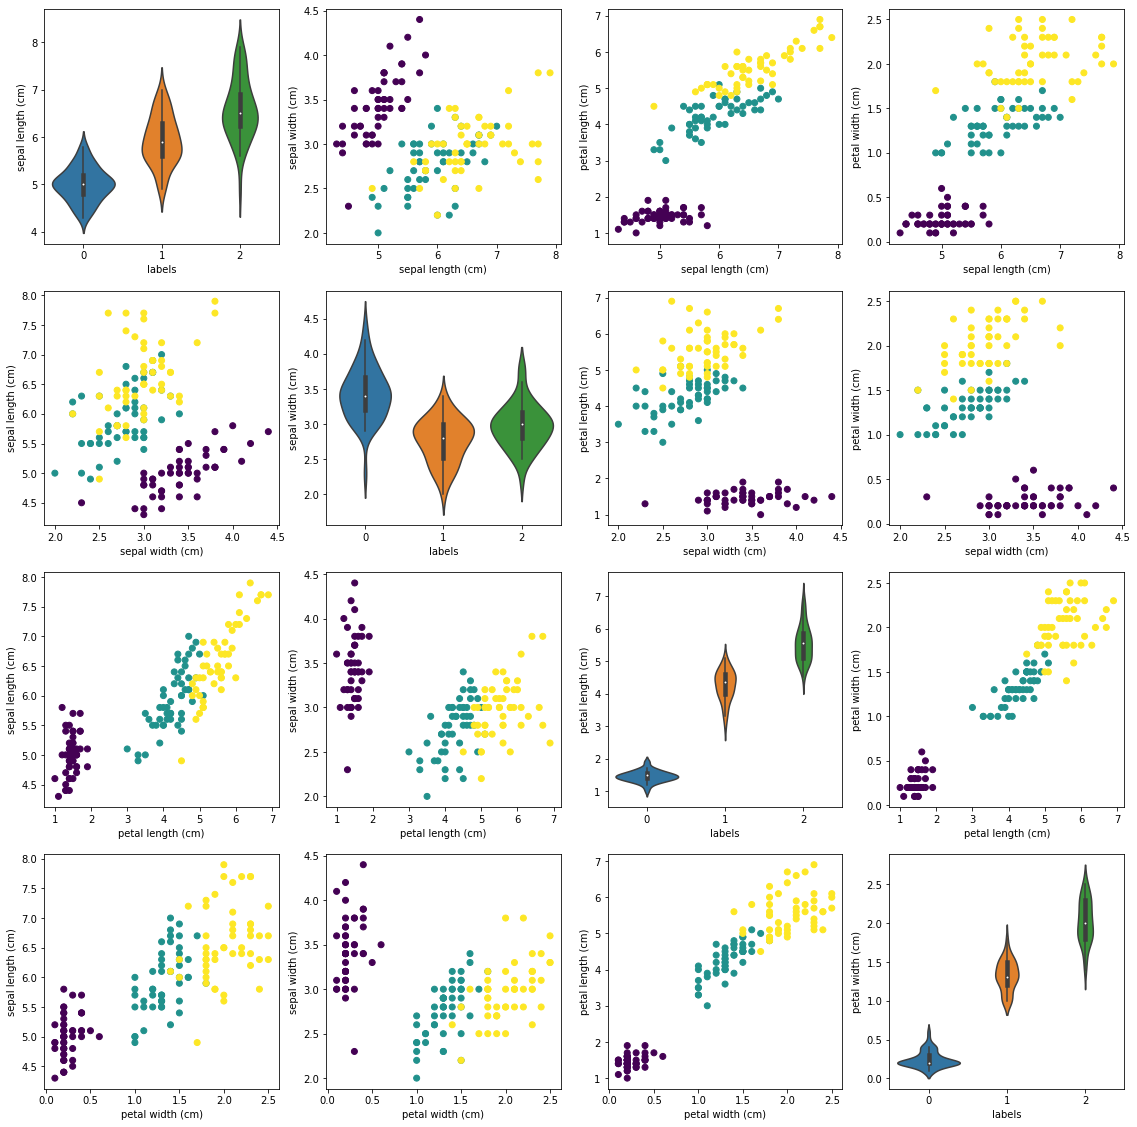

In [ ]:
custom_pairplot(data, feature_names=feature_names, labels="labels")


SVD decomposition to keep only two dimensions (k=2)

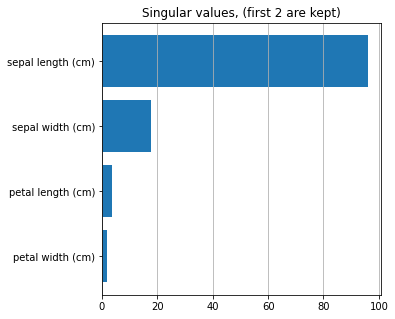

In [ ]:
k = 2

A = data[feature_names].values

U, S, Vt = svd(A)
U_trunc, S_trunc, Vt_trunc = truncate(U, S, Vt, k)
trunc_A = U_trunc @ np.diag(S_trunc)
reduced_data = pd.DataFrame(trunc_A)
plt.figure(figsize=(5, 5))
plt.barh(feature_names[::-1], S[::-1])
plt.title(f"Singular values, (first {k} are kept)")
plt.gca().xaxis.grid(True)

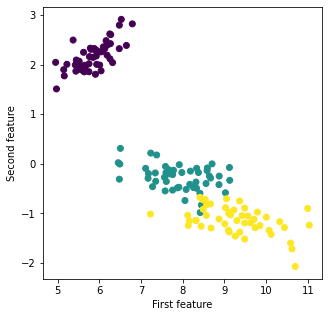

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(reduced_data[0], reduced_data[1], c = iris.target)
plt.xlabel("First feature")
plt.ylabel("Second feature");

**multidimensional scaling (MDS)**

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()

In [ ]:
def make_sania(N=1000, rseed=42):
    # Make a plot with "SANIA" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'SANIA', va='center', ha='center', weight='bold', size=85)
    fig.savefig('sania.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('sania.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

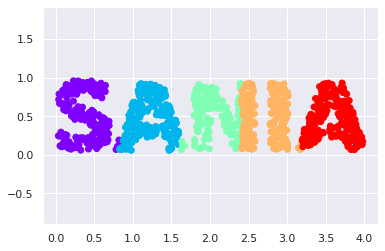

In [ ]:
X = make_sania(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

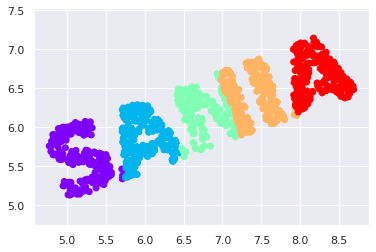

In [ ]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

In [ ]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

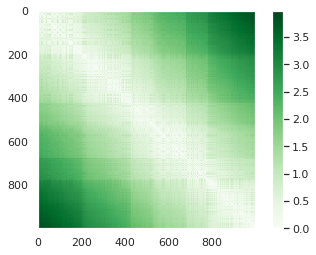

In [ ]:
plt.imshow(D, zorder=2, cmap='Greens', interpolation='nearest')
plt.colorbar();

In [ ]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

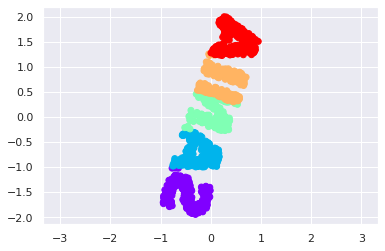

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [ ]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

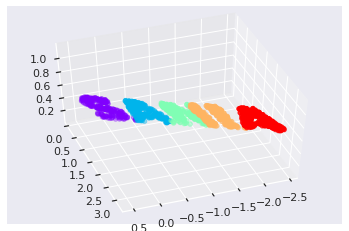

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

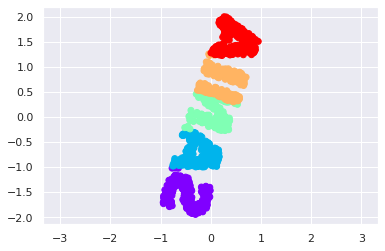

In [ ]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

**Locally Linear Embedding(LLE)**

In [ ]:
def make_sania(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_sania(X)

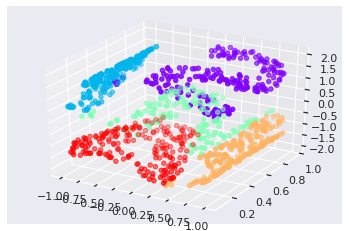

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

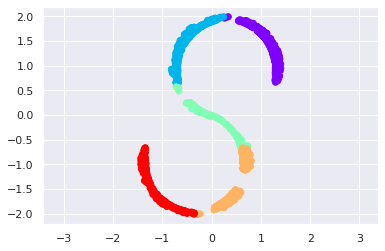

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

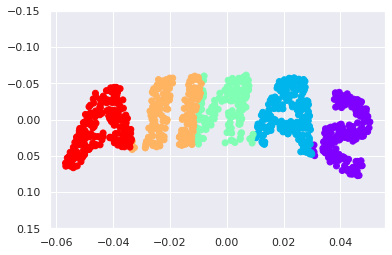

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

**Isomap on Faces**

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

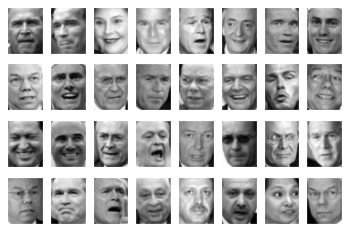

In [ ]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

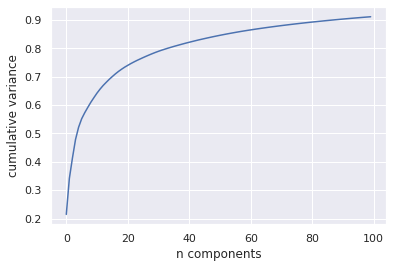

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
#from sklearn.decomposition import RandomizedPCA
model = RandomizedPCA(n_components=100, svd_solver='randomized', whiten=True).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [ ]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


(2370, 2)

In [ ]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

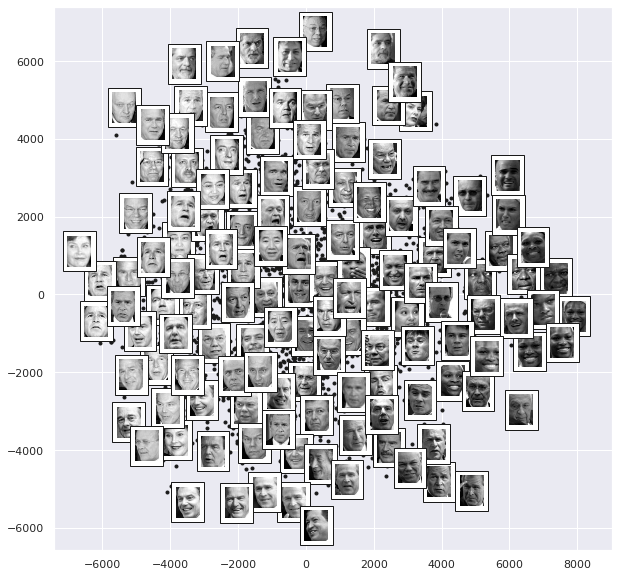

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

**Visualizing Structure in Digits**

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.data.shape

(70000, 784)

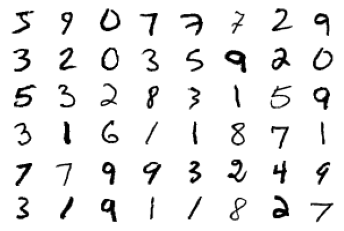

In [ ]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

**t-SNE**

In [ ]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species")
fig.show()

**Project data into 2D with t-SNE**

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig.show()

**Project data into 3D with t-SNE**

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show()

**Visualizing Iris Data with UMAP**

In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 37.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=975116ed1a366e95229899b6543c99555d924a5c87a4b51574b705731188454f
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=a5ba7e358ce0f93c795e1d556ff1895b1c0731bda0cd8b9b8cc214978954bfe1
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import warnings  
import umap
from plotnine import *
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Iris.csv')
del df["Id"]

In [ ]:
def clustUMAP(data,n_neighbors=list(range(5,55,10)),seg_col=None):
    """
    Creates UMAP projections of higher dimensional data
    Inputs:
        data- DataFrame to Vizualize
        n_neighbors- List of n_neighbors to try
        seg_col- Optional column with segment assignments
    Outputs:
        um
    """
    data=data.copy()
    if seg_col is not None:
        seg=data.pop(seg_col)
    plot_frame=pd.DataFrame()
    for n in n_neighbors:
        sub=umap.UMAP(n_neighbors=n).fit_transform(data)
        sub=pd.DataFrame(sub)
        sub.columns=["X","Y"]
        sub["run"]="N_Neighbors= "+str(n)
        if seg_col is not None:
            sub[seg_col]=seg
        plot_frame=plot_frame.append(sub)
    if seg_col is None:
        um=(ggplot(plot_frame,aes("X","Y"))+geom_point()+facet_wrap("run",scales = "free"))+labs(title="UMAP Plots",x="X",y="Y")
    else:
        um=(ggplot(plot_frame,aes("X","Y",color="factor("+seg_col+")"))+geom_point()+facet_wrap("run",scales = "free"))+labs(title="UMAP Plots",x="X",y="Y")
    return um

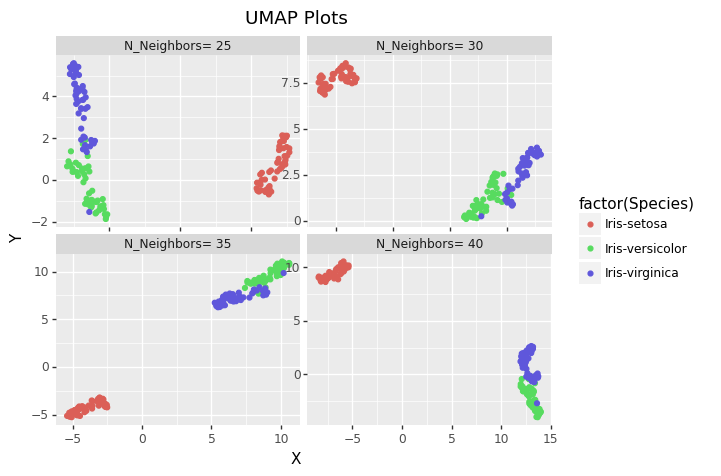

<ggplot: (8764889836457)>

In [ ]:
clustUMAP(df,n_neighbors=[25,30,35,40],seg_col="Species")

**Projections with UMAP**

In [ ]:
from umap import UMAP
import plotly.express as px

df = px.data.iris()

features = df.loc[:, :'petal_width']

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

In [ ]:
import plotly.express as px
from sklearn.datasets import load_digits
from umap import UMAP

digits = load_digits()

umap_2d = UMAP(random_state=0)
umap_2d.fit(digits.data)

projections = umap_2d.transform(digits.data)

fig = px.scatter(
    projections, x=0, y=1,
    color=digits.target.astype(str), labels={'color': 'digit'}
)
fig.show()